In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')

In [2]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])  

In [3]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [4]:
def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c='b', label="Our Prediction")
    ax.legend()

In [5]:
def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color='purple', ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color='purple',
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.5,0.02,cstr, transform=ax.transAxes, color='red')

In [6]:
def plt_intuition(x_train, y_train):

    w_range = np.array([200-200,200+200])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_cost(x_train, y_train, tmp_w, tmp_b)

    @interact(w=(*w_range,10),continuous_update=False)
    def func( w=150):
        f_wb = np.dot(x_train, w) + tmp_b

        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
        fig.canvas.toolbar_position = 'bottom'

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])
        
        ax[1].plot(w_array, cost)
        
        cur_cost = compute_cost(x_train, y_train, w, tmp_b)
        ax[1].scatter(w,cur_cost, s=10, color='r', zorder= 10, label= f"cost at w={w}")
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color='purple', ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color='purple', ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 100)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')
        fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
        plt.show()


In [7]:
# this is the 2D cost curve with interactive slider
def plt_stationary(x_train, y_train):
    # setup figure
    fig = plt.figure( figsize=(9,8))
    #fig = plt.figure(constrained_layout=True,  figsize=(12,10))
    fig.set_facecolor('#ffffff') #white
    fig.canvas.toolbar_position = 'top'
    #gs = GridSpec(2, 2, figure=fig, wspace = 0.01)
    gs = GridSpec(2, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, :],  projection='3d')
    ax = np.array([ax0,ax1,ax2])
    
    #setup useful ranges and common linspaces
    w_range = np.array([200-300.,200+300])
    b_range = np.array([50-300., 50+300])
    b_space  = np.linspace(*b_range, 100)
    w_space  = np.linspace(*w_range, 100)

In [8]:
#https://matplotlib.org/stable/users/event_handling.html
class plt_update_onclick:
    def __init__(self, fig, ax, x_train,y_train, dyn_items):
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.dyn_items = dyn_items
        self.cid = fig.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes == self.ax[1]:
            ws = event.xdata
            bs = event.ydata
            cst = compute_cost(self.x_train, self.y_train, ws, bs)

            # clear and redraw line plot
            self.ax[0].clear()
            f_wb = np.dot(self.x_train,ws) + bs
            mk_cost_lines(self.x_train,self.y_train,ws,bs,self.ax[0])
            plt_house_x(self.x_train, self.y_train, f_wb=f_wb, ax=self.ax[0])

            # remove lines and re-add on countour plot and 3d plot
            for artist in self.dyn_items:
                artist.remove()

            a = self.ax[1].scatter(ws,bs, s=100, color=dlblue, zorder= 10, label="cost with \ncurrent w,b")
            b = self.ax[1].hlines(bs, self.ax[1].get_xlim()[0],ws, lw=4, color=dlpurple, ls='dotted')
            c = self.ax[1].vlines(ws, self.ax[1].get_ylim()[0],bs, lw=4, color=dlpurple, ls='dotted')
            d = self.ax[1].annotate(f"Cost: {cst:.0f}", xy= (ws, bs), xytext = (4,4), textcoords = 'offset points',
                               bbox=dict(facecolor='white'), size = 10)

            #Add point in 3D surface plot
            e = self.ax[2].scatter3D(ws, bs,cst , marker='X', s=100)

            self.dyn_items = [a,b,c,d,e]
            self.fig.canvas.draw()


In [9]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

[-100.  500.]
[-250.  350.]
[-250.         -243.93939394 -237.87878788 -231.81818182 -225.75757576
 -219.6969697  -213.63636364 -207.57575758 -201.51515152 -195.45454545
 -189.39393939 -183.33333333 -177.27272727 -171.21212121 -165.15151515
 -159.09090909 -153.03030303 -146.96969697 -140.90909091 -134.84848485
 -128.78787879 -122.72727273 -116.66666667 -110.60606061 -104.54545455
  -98.48484848  -92.42424242  -86.36363636  -80.3030303   -74.24242424
  -68.18181818  -62.12121212  -56.06060606  -50.          -43.93939394
  -37.87878788  -31.81818182  -25.75757576  -19.6969697   -13.63636364
   -7.57575758   -1.51515152    4.54545455   10.60606061   16.66666667
   22.72727273   28.78787879   34.84848485   40.90909091   46.96969697
   53.03030303   59.09090909   65.15151515   71.21212121   77.27272727
   83.33333333   89.39393939   95.45454545  101.51515152  107.57575758
  113.63636364  119.6969697   125.75757576  131.81818182  137.87878788
  143.93939394  150.          156.06060606  162.1

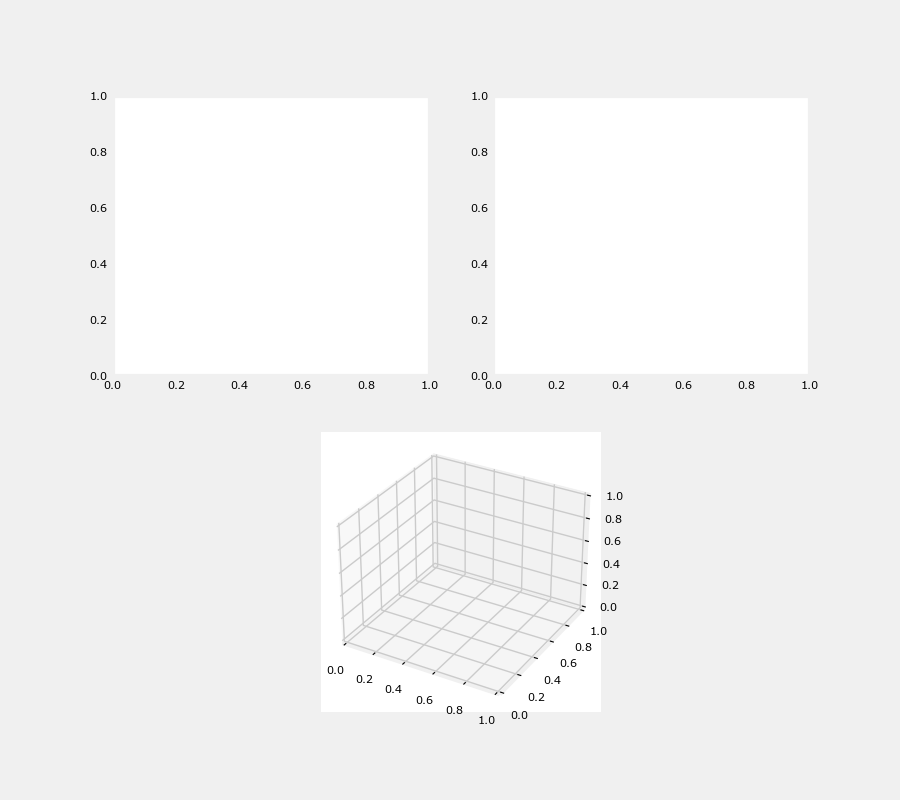

In [10]:
plt.close('all') 
plt_stationary(x_train, y_train)
#updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)